In [1]:
from specialist_data import pipeline
from models.specialist.interface import Specialist

specialist = Specialist()
batch_sizes = [20, 30, 40, 50, 75, 100, 250]

In [2]:
from models.specialist.evolution.static import StaticEvolution

labels = specialist.labels

for batch_size in batch_sizes:
    manager = pipeline()
    interval = batch_size/1000
    specialist.set_classifier()
    clf = specialist.clf
    # Run specialist in all seeds
    for seed, transformed in manager.transformed.items():
        evolution = StaticEvolution(transformed, seed, clf, labels)
        evolution.evolve_process(interval=interval, max_limit=35)

In [3]:
from models.specialist.stats.static_evolution_stats import StaticEvolutionStats

manager = pipeline()
seeds = [seed for seed in manager.transformed.keys()]

stats = StaticEvolutionStats(seeds=seeds, batch_sizes=batch_sizes, optimized=False)
stats.get_data()

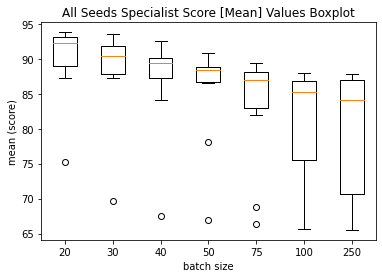

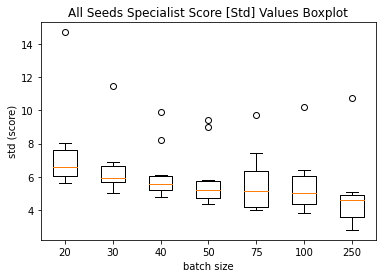

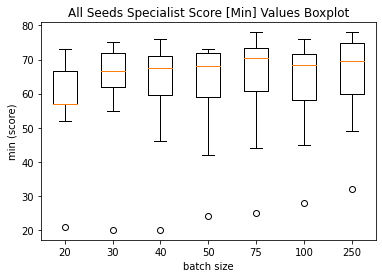

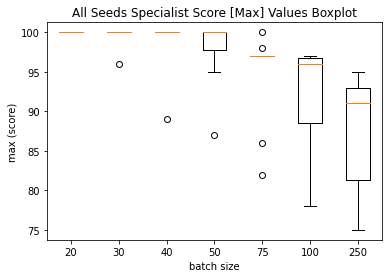

In [4]:
stats.compare_batches_metric('mean')
stats.compare_batches_metric('std')
stats.compare_batches_metric('min')
stats.compare_batches_metric('max')

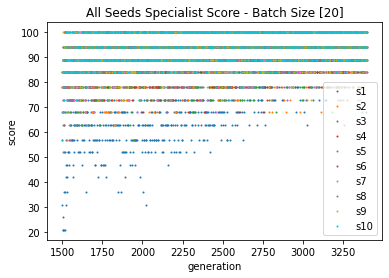

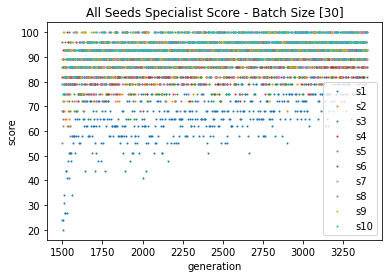

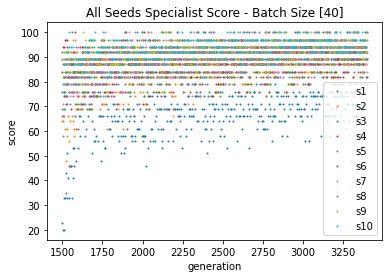

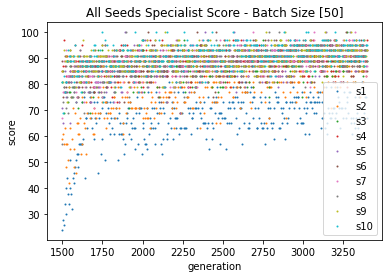

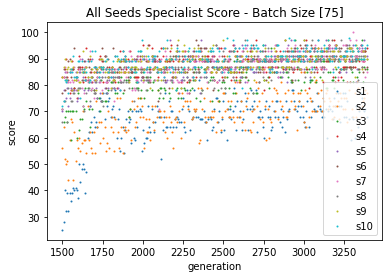

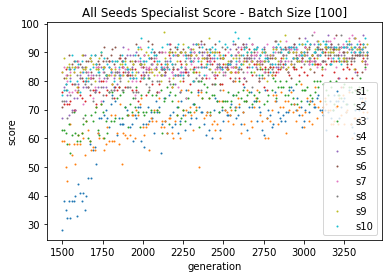

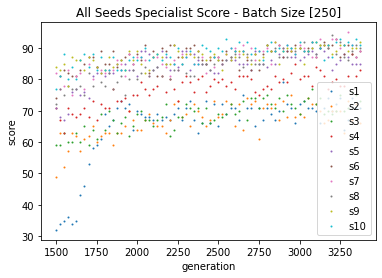

In [5]:
for batch in stats.batch_sizes:
    stats.plot_seeds_scatter(batch)